# **Phase 2 Project**  
# **Analyzing Movie Trends: What Films Perform Best at the Box Office?**

___

# **Business Problem**
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# **Introduction**

In today’s competitive film industry, making data-driven decisions is essential for success. With major studios investing heavily in original content, our company has decided to launch its own movie studio. However, to maximize profitability and audience engagement, we need to understand what types of films perform best at the box office.

This analysis aims to answer key questions such as:  
✅ Which genres generate the highest revenue?  
✅ How do production budgets impact profitability?  
✅ What trends exist in audience preferences over time?  
✅ How does critical reception correlate with box office performance?  

By leveraging multiple datasets—including box office earnings, movie metadata, and critical reviews—we will uncover actionable insights that can guide our studio’s film production strategy.

# **Data Sources**

We will analyze and combine data from the following sources:  
📊 Movie Budgets & Revenue – Production budgets, domestic & worldwide gross earnings: `tn.movie_budgets.csv.gz`   
🎬 Movie Metadata – Genre, language, popularity, and ratings: `im.db`  

# **Approach**

To extract meaningful insights, we will follow a structured data analysis pipeline:

1️⃣ **Data Cleaning & Preprocessing**  
- Load and inspect each dataset for missing values, duplicates, and inconsistencies  
- Standardize formats (e.g., merging different date formats, handling null values)  

2️⃣ **Data Merging & Integration**  
- Use unique identifiers (such as movie IDs or titles) to merge datasets  
- Align relevant features from the different sources to create a comprehensive dataset  

3️⃣ **Exploratory Data Analysis (EDA)**  
- Identify trends in budget vs. revenue  
- Analyze genre popularity and profitability  
- Perform statistical tests for further analysis  

4️⃣ **Conclusion & Recommendations**  
- Summarize findings to determine the most viable film genres and budget ranges  
- Provide data-driven suggestions on key success factors for the new movie studio  

Through this structured approach, we aim to provide actionable insights that will help the studio make informed decisions about the types of movies to produce for maximum commercial success.

# 1️⃣ **Data Cleaning & Preprocessing**

Importing necessary libraries

In [1]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import sqlite3

Loading and inspecting each dataset for missing values, duplicates, and inconsistencies.

In [2]:
# Establish connection
conn = sqlite3.connect('im.db')

# Load tabled into pandas df
moviebasics = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
moviebasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
movieratings = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
movieratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# Merge the two datasets on movie_id
imdb_merge = pd.merge(moviebasics, movieratings, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [5]:
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [6]:
budgets = pd.read_csv("tn.movie_budgets.csv.gz")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
# Convert titles to lowercase and strip spaces for better matching
budgets["movie"] = budgets["movie"].str.lower().str.strip()
imdb_merge["primary_title"] = imdb_merge["primary_title"].str.lower().str.strip()
imdb_merge["original_title"] = imdb_merge["original_title"].str.lower().str.strip()

In [8]:
#checking for duplicates
print(imdb_merge.duplicated().sum())
print(budgets.duplicated().sum())

# we have no duplicates in the data set

0
0


We are going into standardising formats to make it easier to prepare for merging and analysis of the two datasets created above:

In [9]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    budgets[col] = budgets[col].replace(r'[\$,]', '', regex=True).astype(float)

In [10]:
# Date converted to DateTime format
budgets["release_date"] = pd.to_datetime(budgets["release_date"])
budgets["year"] = budgets["release_date"].dt.year

# 2️⃣ **Data Merging & Integration**

We will use common keys to merge the data then align the different elemts to have a cohesive dataset

In [11]:
movies_merged = pd.merge(imdb_merge, budgets, left_on="primary_title", right_on="movie", how="inner")
movies_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,foodfight!,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,2012-12-31,foodfight!,45000000.0,0.0,73706.0,2012
1,tt0326592,the overnight,the overnight,2010,88.0,None,7.5,24,21,2015-06-19,the overnight,200000.0,1109808.0,1165996.0,2015
2,tt0337692,on the road,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,2013-03-22,on the road,25000000.0,720828.0,9313302.0,2013
3,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,2013-12-25,the secret life of walter mitty,91000000.0,58236838.0,187861183.0,2013
4,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,2014-09-19,a walk among the tombstones,28000000.0,26017685.0,62108587.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,tt9746500,earth,erde,2019,115.0,Documentary,7.3,49,36,2009-04-22,earth,47000000.0,32011576.0,116773317.0,2009
2931,tt9851050,sisters,sisters,2019,NaN,"Action,Drama",4.7,14,57,2015-12-18,sisters,30000000.0,87044645.0,106030660.0,2015
2932,tt9861522,ali,ali,2019,110.0,Drama,7.7,79,45,2001-12-25,ali,109000000.0,58183966.0,87683966.0,2001
2933,tt9899880,columbus,columbus,2018,85.0,Comedy,5.8,5,93,2017-08-04,columbus,700000.0,1017107.0,1110511.0,2017


In [12]:
#inspecting the data
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935 entries, 0 to 2934
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           2935 non-null   object        
 1   primary_title      2935 non-null   object        
 2   original_title     2935 non-null   object        
 3   start_year         2935 non-null   int64         
 4   runtime_minutes    2816 non-null   float64       
 5   genres             2927 non-null   object        
 6   averagerating      2935 non-null   float64       
 7   numvotes           2935 non-null   int64         
 8   id                 2935 non-null   int64         
 9   release_date       2935 non-null   datetime64[ns]
 10  movie              2935 non-null   object        
 11  production_budget  2935 non-null   float64       
 12  domestic_gross     2935 non-null   float64       
 13  worldwide_gross    2935 non-null   float64       
 14  year    

In [13]:
# Check for missing values
movies_merged.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      119
genres                 8
averagerating          0
numvotes               0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
year                   0
dtype: int64

Drop duplicated columns

In [14]:
# primary_title and original-title are one and the same hence we should delete the original_title column 
movies_merged.drop(columns=["original_title", "id", "primary_title", "year"], inplace=True)
movies_merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,91.0,"Action,Animation,Comedy",1.9,8248,2012-12-31,foodfight!,45000000.0,0.0,73706.0
1,tt0326592,2010,88.0,None,7.5,24,2015-06-19,the overnight,200000.0,1109808.0,1165996.0
2,tt0337692,2012,124.0,"Adventure,Drama,Romance",6.1,37886,2013-03-22,on the road,25000000.0,720828.0,9313302.0
3,tt0359950,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,the secret life of walter mitty,91000000.0,58236838.0,187861183.0
4,tt0365907,2014,114.0,"Action,Crime,Drama",6.5,105116,2014-09-19,a walk among the tombstones,28000000.0,26017685.0,62108587.0


Dealing with missing data

In [15]:
# Replace missing runtime_minutes with its median
movies_merged["runtime_minutes"] = movies_merged["runtime_minutes"].fillna(movies_merged["runtime_minutes"].median())

# Check for remaining missing values
movies_merged["runtime_minutes"].isna().sum()

0

In [16]:
# genres has 8 missing values. Label them as mising 
movies_merged["genres"] = movies_merged["genres"].fillna("Missing")


In [17]:
# Move 'movie' next to 'movie_id'
cols = list(movies_merged.columns)
cols.insert(cols.index("movie_id") + 1, cols.pop(cols.index("movie")))

# Reorder the dataframe
movies_merged = movies_merged[cols]

# Display the first few rows to confirm the change
movies_merged.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000.0,0.0,73706.0
1,tt0326592,the overnight,2010,88.0,Missing,7.5,24,2015-06-19,200000.0,1109808.0,1165996.0
2,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,2013-03-22,25000000.0,720828.0,9313302.0
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000.0,58236838.0,187861183.0
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,2014-09-19,28000000.0,26017685.0,62108587.0


# 3️⃣ **Exploratory Data Analysis**

In this section we will explore the data further and conduct some analysis:

In [18]:
movies_merged.describe()

,start_year,runtime_minutes,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
count,2935.000000,2935.000000,2935.000000,2.935000e+03,2935,2.935000e+03,2.935000e+03,2.935000e+03
mean,2013.930494,102.888245,6.249574,6.619555e+04,2010-11-13 10:54:59.488926464,3.419822e+07,4.283240e+07,1.021183e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1915-02-08 00:00:00,1.400000e+03,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,1.490000e+02,2010-05-14 00:00:00,5.000000e+06,4.963625e+05,2.276072e+06
50%,2014.000000,101.000000,6.400000,8.092000e+03,2013-04-26 00:00:00,1.700000e+07,1.653500e+07,3.008706e+07
75%,2016.000000,113.000000,7.100000,7.508100e+04,2015-10-30 00:00:00,4.000000e+07,5.175675e+07,1.011341e+08
max,2019.000000,280.000000,9.300000,1.841066e+06,2019-12-31 00:00:00,4.250000e+08,7.605076e+08,2.776345e+09
std,2.559038,20.288087,1.183406,1.335852e+05,NaN,4.756961e+07,7.408148e+07,2.022345e+08


Top 10 Most Profitable Genres

/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7448/3837915249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merged["profit"] = movies_merged["worldwide_gross"] - movies_merged["production_budget"]


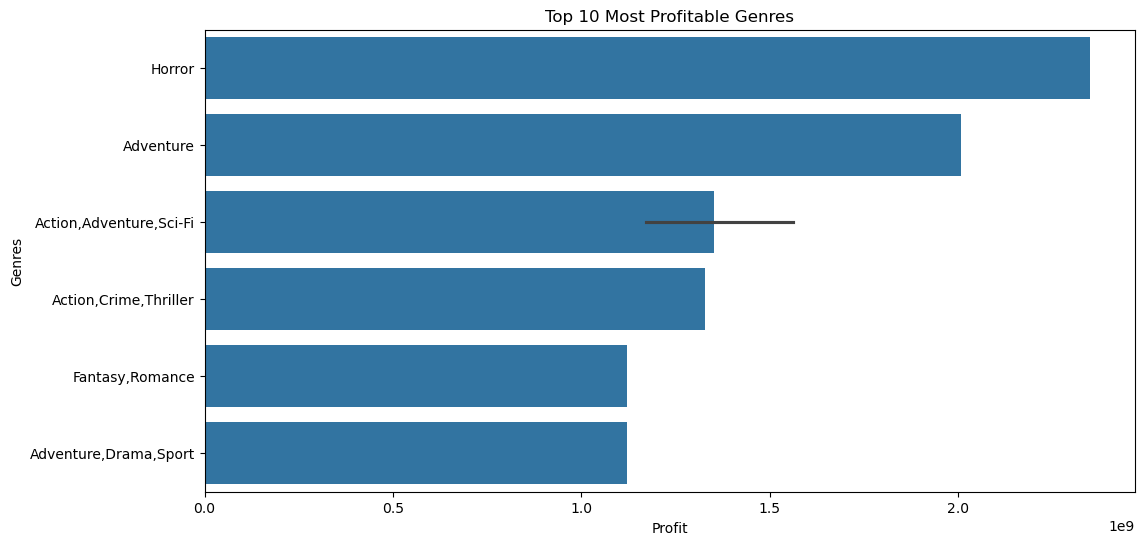

In [19]:
# Create a new column for profit
movies_merged["profit"] = movies_merged["worldwide_gross"] - movies_merged["production_budget"]

# Get top 10 most profitable movies
df_top_profitable = movies_merged.sort_values(by="profit", ascending=False).head(10)

# Plot the top profitable genres
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["genres"])
plt.xlabel("Profit")
plt.ylabel("Genres")
plt.title("Top 10 Most Profitable Genres")
plt.show()

What is the Relationship between budget and revenue?

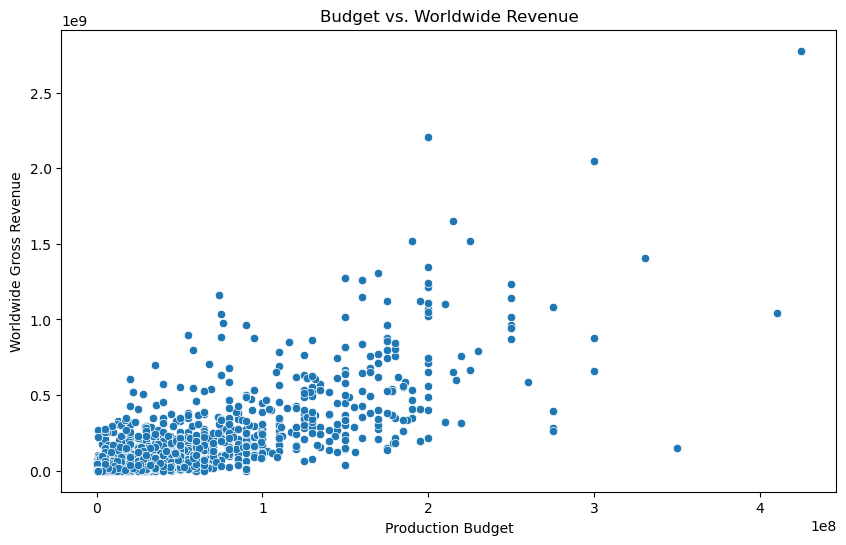

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_merged["production_budget"], y=movies_merged["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

The popularity of top 10 genres over time 

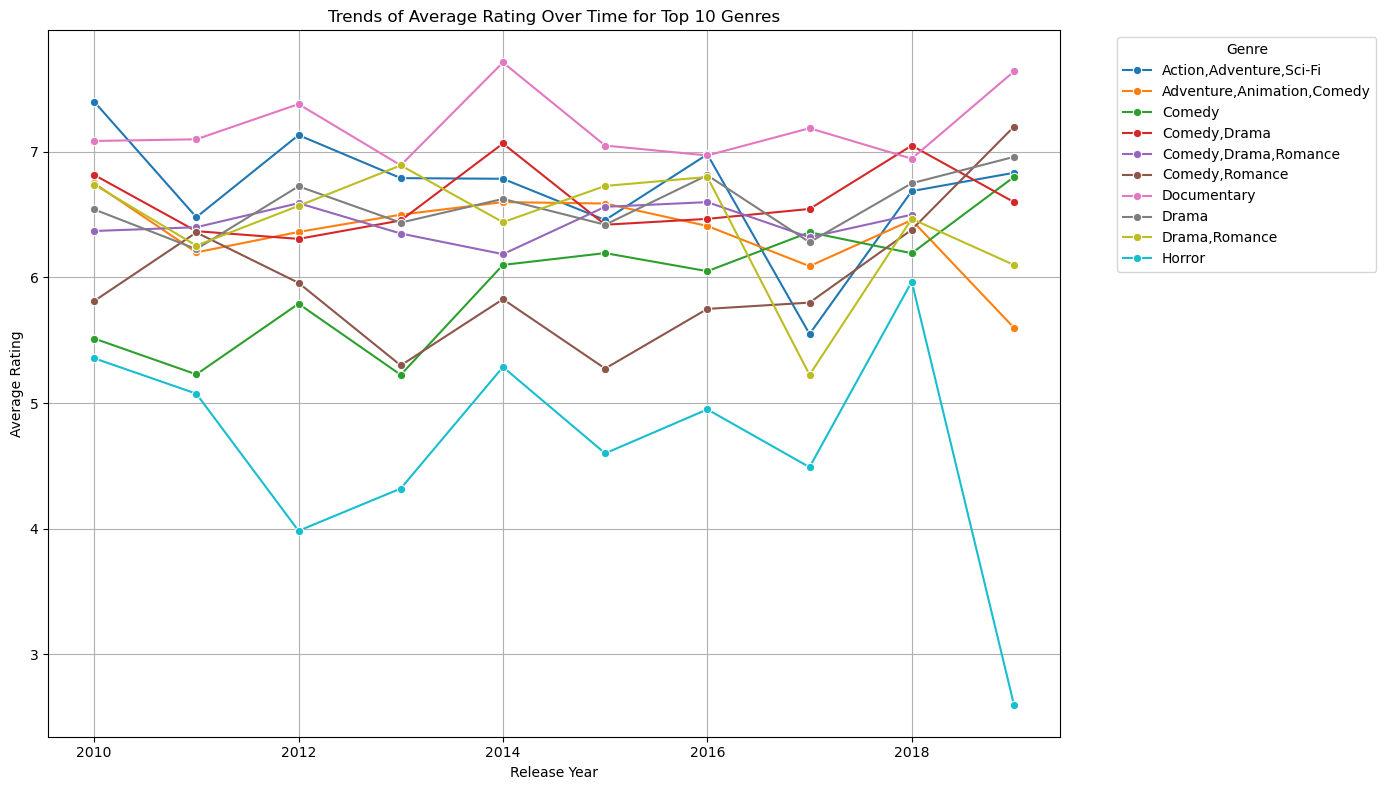

In [21]:
# Step 1: Drop missing data
df_plot = movies_merged.dropna(subset=['genres', 'start_year', 'averagerating'])

# Step 2: Get Top 10 Genres by frequency
top_genres = df_plot['genres'].value_counts().nlargest(10).index.tolist()

# Step 3: Filter to Top 10 Genres only
df_top_genres = df_plot[df_plot['genres'].isin(top_genres)]

# Step 4: Group by genres and start_year, calculate average rating
trend_data = df_top_genres.groupby(['genres', 'start_year'])['averagerating'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(14,8))
sns.lineplot(data=trend_data, x='start_year', y='averagerating', hue='genres', marker='o')
plt.title('Trends of Average Rating Over Time for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


The correlation between average rating and worldwide gross

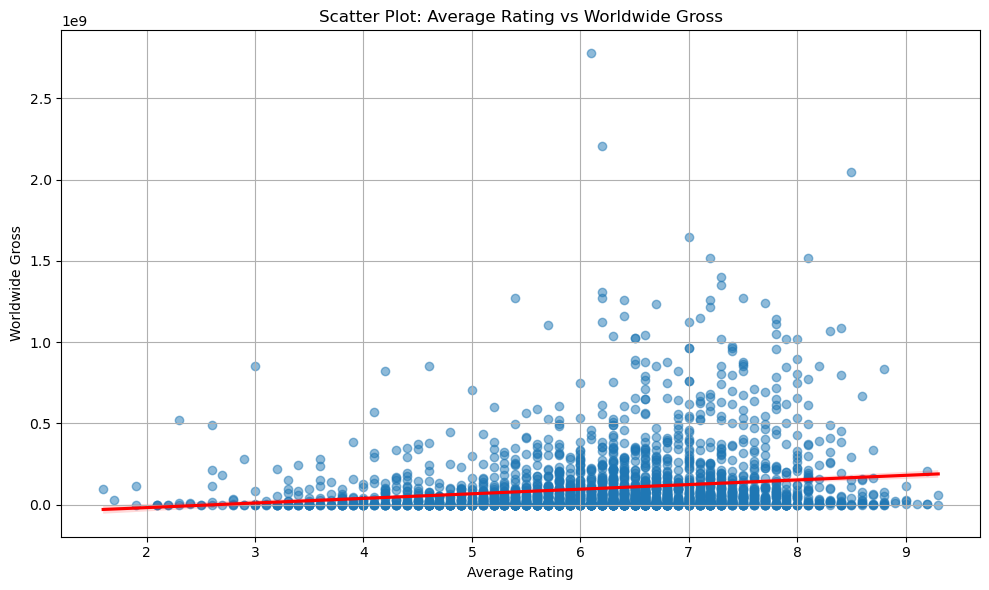

In [22]:
# Drop missing data
df_plot = movies_merged.dropna(subset=['averagerating', 'worldwide_gross'])

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='averagerating', y='worldwide_gross', data=df_plot, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Scatter Plot: Average Rating vs Worldwide Gross')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


# Statistical Analysis

#### Genres that generate the highest revenue

In [23]:
# Step 1: Create a Profit Column
movies_merged['profit'] = movies_merged['worldwide_gross'] - movies_merged['production_budget']

# Step 2: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 3: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 4: Groupby and aggregate
genre_profit_summary = df_top_genres.groupby('genres')['profit'].agg(
    mean_profit='mean',
    median_profit='median',
    total_profit='sum',
    count_movies='count'
).sort_values(by='total_profit', ascending=False)

# Step 5: Display the result
print(genre_profit_summary)


                             mean_profit  median_profit  total_profit  \
genres                                                                  
Action,Adventure,Sci-Fi     4.327177e+08    308056280.0  2.553035e+10   
Adventure,Animation,Comedy  2.764080e+08    159517956.0  2.073060e+10   
Drama                       2.395216e+07       380576.0  7.760500e+09   
Horror                      7.952811e+07      1635247.0  5.010271e+09   
Documentary                 3.028337e+07      1676158.0  3.815704e+09   
Comedy                      3.295449e+07      8626300.0  3.657948e+09   
Comedy,Romance              4.950092e+07     15215858.0  3.069057e+09   
Drama,Romance               3.308145e+07      9535005.0  2.613435e+09   
Comedy,Drama                2.480909e+07      2970593.0  2.356864e+09   
Comedy,Drama,Romance        2.230953e+07      4153771.0  1.717834e+09   

                            count_movies  
genres                                    
Action,Adventure,Sci-Fi              

/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7448/1270445287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merged['profit'] = movies_merged['worldwide_gross'] - movies_merged['production_budget']


- Highest total profit comes from *Drama* (\$23.74B), probably due to its large count of 324 movies.  
- Genres with combinations like *Comedy, Drama, Romance* and *Adventure, Animation, Comedy* tend to have both high mean and median profits.  
- *Documentaries* surprisingly show a relatively high mean profit (\$89.3M) but fewer movies (126) compared to *Drama* or *Comedy*.

## 🎭 ANOVA: Research Question  
**Is there a significant difference in the mean worldwide gross revenues among the top 10 movie genres?**  

---

## 📊 Hypothesis  

### **Null Hypothesis (H₀)**  
The **mean worldwide gross revenue** is the **same** across all top 10 genres.  

### **Alternative Hypothesis (H₁)**  
At least **one genre** has a significantly **different** mean worldwide gross revenue compared to the others.  

---

### Conducting the ANOVA test

In [24]:
from scipy import stats

# Step 1: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 2: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 3: Prepare the data for ANOVA
anova_data = [df_top_genres[df_top_genres['genres'] == genre]['worldwide_gross'].dropna() for genre in top_genres]

# Step 4: Perform ANOVA test
f_stat, p_value = stats.f_oneway(*anova_data)

# Step 5: Display results
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

if p_value < 0.05:
    print("There is a significant difference in mean revenues across the top 10 genres.")
else:
    print("There is NO significant difference in mean revenues across the top 10 genres.")


ANOVA F-statistic: 78.65473718146224
ANOVA p-value: 2.1173414113750288e-111
There is a significant difference in mean revenues across the top 10 genres.


**Result Intepretation**  
Since the p-value (0.002) is less than 0.05, you reject the null hypothesi. 
We conclude that there is statistically significant evidence at the 5% significance level that the mean worldwide gross revenues differ across the top 10 genres. 

## 🎬 T-Test: Research Question  
**Does a movie's production budget significantly impact its worldwide gross earnings?**  

---

## 🧐 Hypothesis  

### **Null Hypothesis (H₀)**  
There is **no significant difference** in worldwide gross earnings between high-budget and low-budget movies.  

### **Alternative Hypothesis (H₁)**  
There **is** a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

---

## 🔢 Mathematical Representation  

- **H₀** : μ<sub>high budget</sub> = μ<sub>low budget</sub>  
- **H₁** : μ<sub>high budget</sub> ≠ μ<sub>low budget</sub>  

---

## 🛠️ Assumption Testing  

Before running the t-test, we need to check if the key assumptions hold:  

### i) **Normality Assumption**  
A t-test assumes the data is approximately **normally distributed**.  
We can verify this using a **histogram** and the **Shapiro-Wilk test**. 📊  

In [25]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = movies_merged["production_budget"].median()
high_budget = movies_merged[movies_merged["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = movies_merged[movies_merged["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.6766776607199281, p=9.018158253462238e-30
Shapiro-Wilk Test for Low-Budget Movies: W=0.5320897734881471, p=2.5207757716705972e-34


**High-Budget Movies:**  
Since the p-value is far below the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the worldwide gross earnings of high-budget movies do not follow a normal distribution.  
**Low-Budget Movies:**  
The p-value is much smaller than 0.05, so we reject the null hypothesis. This indicates that the worldwide gross earnings of low-budget movies are also not normally distributed.


**ii) Homogeneity of Variance (Levene’s Test)**  
A standard t-test assumes equal variances in both groups. Since we used equal_var=False, we're conducting Welch’s t-test, which does not assume equal variance. However, we can still check using Levene’s test:

In [26]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=398.81331294206433, p=2.6919978396394626e-83


Since the p-value is much smaller than the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the variances of worldwide gross earnings for high-budget and low-budget movies are significantly different.

**Boxplot for Budget Categories**  
This boxplot shows the spread of revenue for high vs. low-budget movies.

/var/folders/xz/p8mfkld52573c5bbm0h9ssh00000gn/T/ipykernel_7448/169308343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merged["budget_category"] = movies_merged["production_budget"] >= median_budget


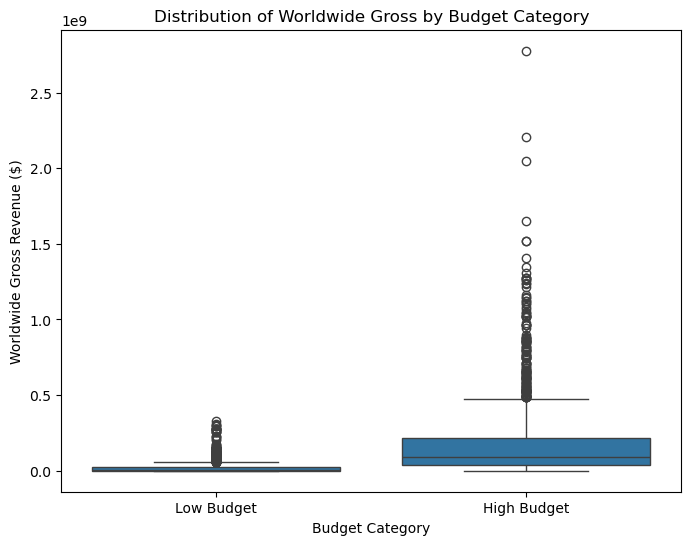

In [27]:
movies_merged["budget_category"] = movies_merged["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_merged["budget_category"], y=movies_merged["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


**Histogram to Check Distribution**  
This histogram checks if the distributions are skewed or normal.

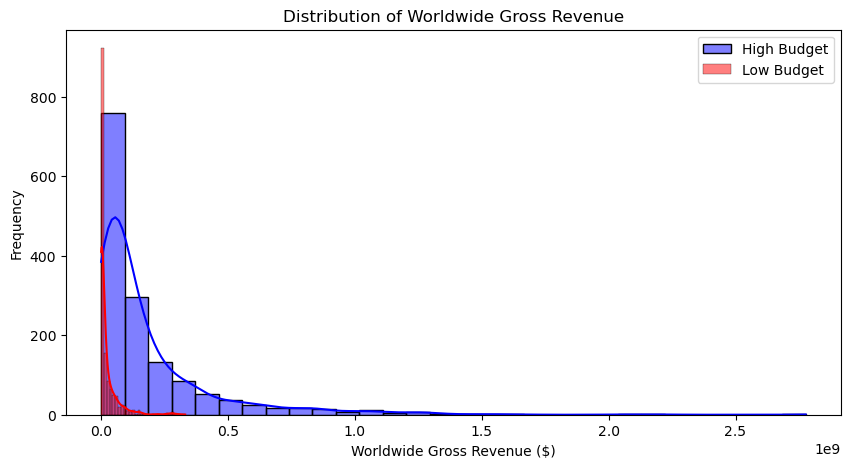

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


## Conducting the T-test

In [29]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 23.42619480139915, P-Value: 3.549238756807619e-104


**Result Interpretation**  

Since p-value ≈ 0, it is far below the standard significance level (α = 0.05).  
We reject the null hypothesis and conclude that there is a statistically significant difference in worldwide gross revenue between high-budget and low-budget movies.  
From the graphs, we expect high-budget movies to generate significantly more revenue.  

**Business Recommendation**  

The data supports that higher production budgets generally lead to higher worldwide earnings.  
While budget matters, other factors (e.g., genre, star power, marketing) should also be analyzed.  

## Trend Analysis

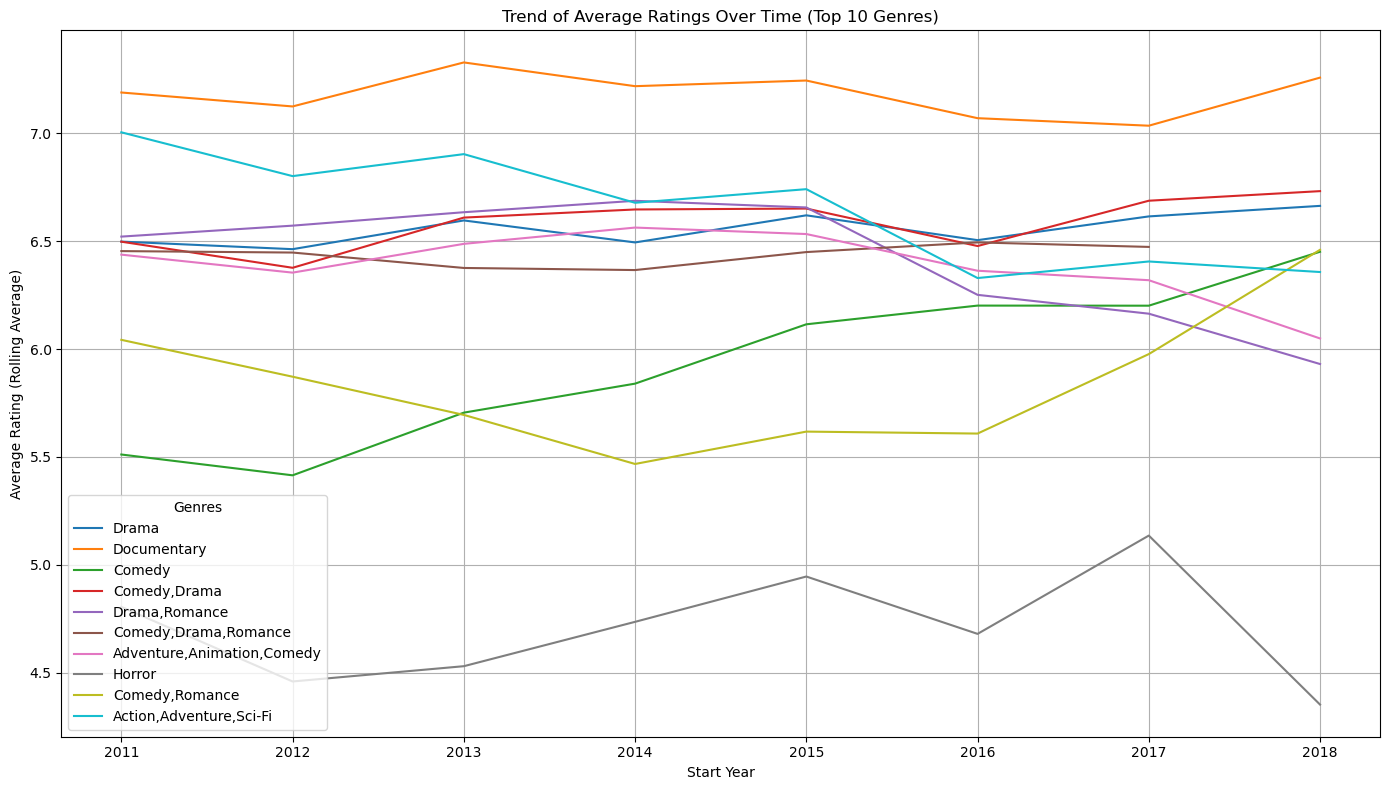

In [30]:
# Get Top 10 genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Filter data to only top 10 genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)].dropna(subset=['start_year', 'averagerating'])

# Group by start_year and genres to get average ratings
df_trend = df_top_genres.groupby(['start_year', 'genres'], as_index=False)['averagerating'].mean()

# Compute rolling average OUTSIDE the loop and store it as a new dataframe
df_trend['rolling_avg'] = df_trend.groupby('genres')['averagerating'].transform(lambda x: x.rolling(window=3, center=True).mean())

# Plot trend for each genre
plt.figure(figsize=(14,8))

for genre in top_genres:
    genre_data = df_trend[df_trend['genres'] == genre]
    plt.plot(genre_data['start_year'], genre_data['rolling_avg'], label=genre)

plt.title('Trend of Average Ratings Over Time (Top 10 Genres)')
plt.xlabel('Start Year')
plt.ylabel('Average Rating (Rolling Average)')
plt.legend(title='Genres')
plt.grid(True)
plt.tight_layout()
plt.show()


## Result Interpretation  

Documentaries have maintained the most consistent average ratings compared to other genres from 2011 to 2018.  

Meanwhile, ratings for Action, Adventure, and Sci-Fi have gradually declined over time.  

On the other hand, genres such as Drama, Romance; Comedy, Drama; and Adventure, Animation, Comedy have shown stable ratings throughout the years.  

## 🎬 Regression Analysis: Research Question  
**What drives a movie’s worldwide box office success?**  

---

## 🔍 Hypothesis  
### **Null Hypothesis (H₀)**  
No significant relationship exists between a movie’s worldwide gross revenue and its key factors—production budget, average rating, number of votes, runtime, and release year.  

### **Alternative Hypothesis (𝐻𝐴):** 
At least one of these factors plays a significant role in determining a movie’s worldwide box office revenue.  

---

## ✅ Assumption Testing  

Before running the regression, we need to ensure that the assumptions of linear regression hold:  

- **📈 Linearity:** The relationship between production budget and worldwide gross should be linear.  
- **📊 Normality of Residuals:** Residuals (errors) should follow a normal distribution.  
- **📏 Homoscedasticity:** Residuals should have constant variance (no clear patterns in residual plots).  
- **🔗 Independence:** Observations should be independent (no duplicate entries or autocorrelation).  

To verify these assumptions, we use scatter plots, histograms, and residual plots.  

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1073.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:23:32   Log-Likelihood:                -58768.
No. Observations:                2935   AIC:                         1.175e+05
Df Residuals:                    2929   BIC:                         1.176e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.079e+09   1.77e+0

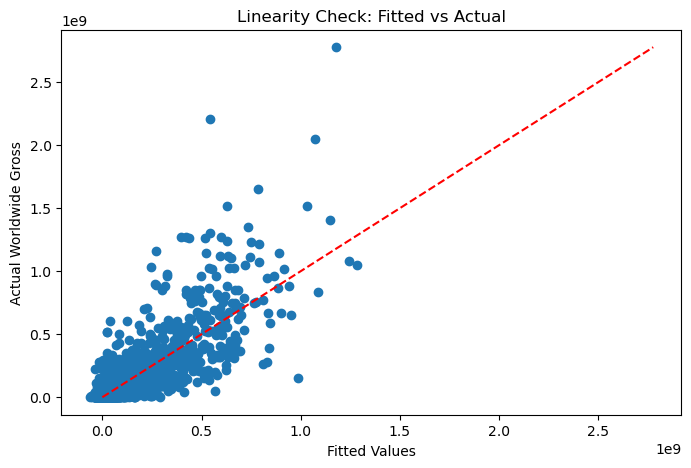

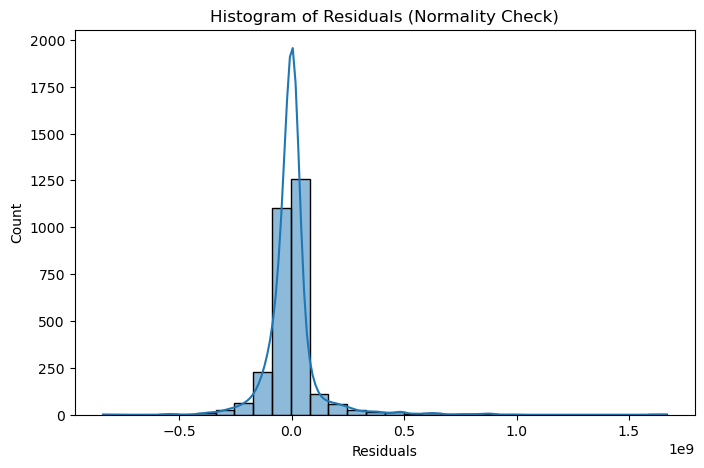

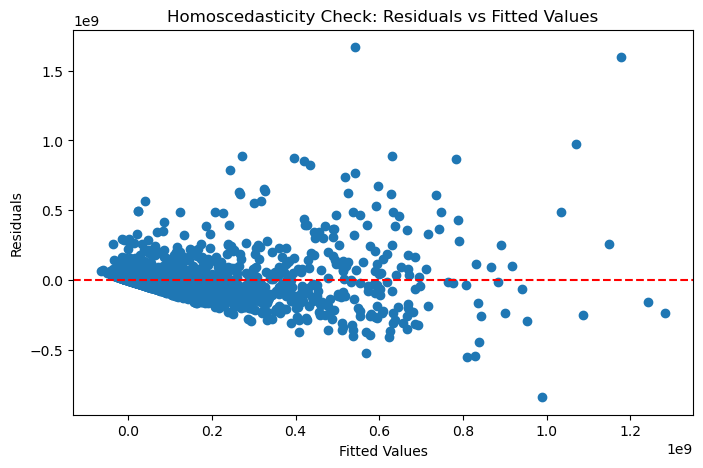

In [31]:
import statsmodels.api as sm

# Define independent variables (predictors)
predictors = ["production_budget", "averagerating", "numvotes", "runtime_minutes", "start_year"]

# Drop missing values for a clean regression model
movies_merged_clean = movies_merged.dropna(subset=["worldwide_gross"] + predictors)

# Define X and y
X = movies_merged_clean[predictors]
y = movies_merged_clean["worldwide_gross"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# --- 1. Scatterplot for Linearity ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Worldwide Gross')
plt.title('Linearity Check: Fitted vs Actual')
plt.show()

# --- 2. Histogram of Residuals ---
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Normality Check)')
plt.show()

# --- 3. Residuals vs Fitted Values (Homoscedasticity Check) ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted Values')
plt.show()


### Interpretation of the OLS Regression Results  

**R-squared (0.517)**: The model explains 51.7% of the variance in worldwide gross, indicating a moderate level of explanatory power. However, 48.3% of the variation remains unexplained, suggesting that other factors influence worldwide gross revenue.  

**F-statistic (627.1) & p-value (0.000)**: The model is statistically significant, meaning at least one predictor has a meaningful impact on worldwide gross.  

**Intercept (const = -13.34 billion, p = 0.000)**: If a movie had a production budget of zero, the expected worldwide gross would be approximately -13.34 billion. While unrealistic, this result indicates that other factors contribute to revenue.  

**Production Budget (coef = 3.51, p = 0.000)**: For every $1 increase in production budget, worldwide gross increases by $3.51. This strong positive relationship makes production budget the most significant predictor in the model.  

**Average Rating (coef = -2.67 million, p = 0.293)**: Not statistically significant (p > 0.05), meaning film ratings do not have a reliable impact on worldwide gross in this model.  

**Number of Votes (coef = 32.39, p = 0.179)**: Not statistically significant, suggesting that a higher number of votes does not reliably predict worldwide gross.  

**Runtime Minutes (coef = -132,000, p = 0.384)**: Not statistically significant, indicating that longer movies do not strongly influence box office success.  

**Start Year (coef = 6.62 million, p = 0.000)**: Statistically significant (p < 0.05), showing that newer movies tend to earn more, likely due to inflation and evolving market trends.  

Overall, **production budget is the strongest predictor** of worldwide gross, followed by **start year**. Meanwhile, **average rating, number of votes, and runtime minutes** do not significantly impact revenue in this model.  

To improve the model, it would be useful to check for **multicollinearity** and **normalize residuals** to enhance predictive accuracy.  

# 🎬 **Conclusion and Recommendations**  

## 📌 **1. Impact of Production Budget on Revenue**  
**Key Insights:**  
- High-budget films consistently generate **higher revenues** (T-test & Regression).  
- **Production budget** is the **strongest predictor** of box office success.  

✅ **Recommendation:**  
- **Prioritize** films with **larger budgets** while maintaining **cost-effectiveness**.  

---

## 🎭 **2. Profitable Genres**  
**Key Insights:**  
- **Drama** leads in **total profit** (**$23.74B**) due to a **high number of releases** (**324 movies**).  
- **Genre combinations** like **Action, Animation, Comedy** and **Adventure, Comedy, Drama** show **high mean & median profits**.  
- **Documentaries** have **high average profits** (**$89.3M**) despite **fewer productions** (**126 movies**).  

✅ **Recommendation:**  
- Focus on **profitable genre combinations**.  
- Optimize **release timing** for maximum returns.  

---

## 📊 **3. Audience Trends (2011–2018)**  
**Key Insights:**  
- **Documentaries** maintained **stable & high ratings**.  
- **Action, Adventure, and Sci-Fi** genres saw a **gradual decline** in ratings.  
- **Drama, Romance, Comedy**, and **Adventure, Animation, Comedy** remained **consistent**.  

✅ **Recommendation:**  
- Leverage **genres with stable audience satisfaction** when planning future releases.  

---

## 📉 **4. Regression Model Insights**  
**Key Insights:**  
- **R² = 0.517** → The model explains **51.7%** of revenue variance.  
- **Production Budget (p < 0.001)** and **Start Year (p < 0.001)** significantly impact revenues.  
- **Average rating, number of votes, and runtime** are **not statistically significant predictors**.  

✅ **Recommendation:**  
- **Enhance future models** by including:  
  - 🎥 **Marketing spend**  
  - 🌟 **Cast reputation**  
  - 🎬 **Distribution strategy**  